## Perceptron using sklearn 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn.datasets as dts
import sklearn.model_selection as ms 
import sklearn.linear_model as lm 
import sklearn.metrics as metrics


In [2]:
# generate classification dataset 
dataset = dts.make_classification(n_samples=1000, n_features=2,n_redundant=0,random_state=7)


In [3]:
# split into test train sets 
X = dataset[0]
y = dataset[1]

x_train, x_test, y_train, y_test = ms.train_test_split(X,y, test_size=0.20)

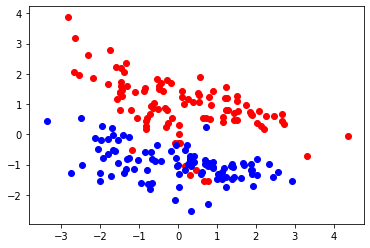

In [4]:
# seperate classes and plot them

red_x = x_test[np.where(y_test ==1)[0]]
blue_x = x_test[np.where(y_test ==0)[0]]

plt.scatter(red_x[:,0], red_x[:,1], color="red")
plt.scatter(blue_x[:,0], blue_x[:,1], color="blue")

plt.show()

In [5]:
# fit perceptron algorithm to classification data

perceptron = lm.Perceptron(max_iter=100, random_state=12, shuffle=False)
perceptron.fit(x_train, y_train)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=12, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
# get predicition and accuracy 
y_pred = perceptron.predict(x_test)
metrics.accuracy_score(y_pred, y_test)

0.895

In [7]:
# get decision boundary paramaters 
w = perceptron.coef_[0]
slope = -(w[0]/w[1])
intercept = -(1.0/w[1])


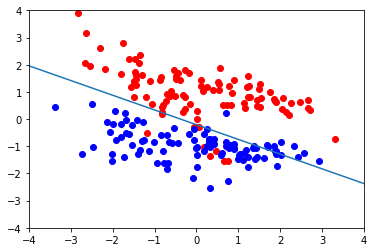

In [8]:
# scatter plot with decision boundary
x_values = np.linspace(-5,5,1000)
desc_boundary = slope*x_values+ intercept 

plt.scatter(red_x[:,0], red_x[:,1], color="red")
plt.scatter(blue_x[:,0], blue_x[:,1], color="blue")
plt.plot(x_values, desc_boundary)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

## Manual coded perceptron 


In [9]:
# rescale the targets for test and train sets 
y_train[y_train==0]= -1

# intialization function 
np.random.seed(1)

def initialize_weights(weights_shape):
    np.random.seed(1)
    if isinstance(weights_shape, int): 
        initial_weights = np.random.randn(weights_shape)
    else:
        shape_x = weights_shape[0]
        shape_y = weights_shape[1]
        initial_weights = np.random.randn(shape_x, shape_y)
    
    return initial_weights 


# first step is initalize weights 
weights = initialize_weights(2)

def inference(weights, initial_x, bias)
  check_output =  np.sum(weights*initial_x) + bias
    # assign predicted label 
    if check_output >= 0: 
        pred_value = 1 
    else: 
        pred_value = - 1 

    return pred_value


# second step run inference 
bias = 1.0 
data_index = 0 

epochs = 100
for ep in range(0, epochs): 

    data_indicies =  np.random.choice(np.arange(0,x_train.shape[0]), x_train.shape[0])
    for data_index in data_indicies : 

        initial_x = x_train[data_index]
        
        pred_value= inference(weights, initial_x, bias)

        # update weights 
        if pred_value == y_train[data_index]: 
            pass
        else: 
            loss_derivative =  y_train[data_index]*x_train[data_index]
            weights = weights + loss_derivative

    


In [10]:
perceptron.coef_ 

array([[2.63918024, 4.87697483]])

In [11]:
weights

array([1.40886114, 4.12784015])

In [14]:
manual_slope = -(weights[0]/weights[1])
manual_intercept = -(1.0/weights[1])


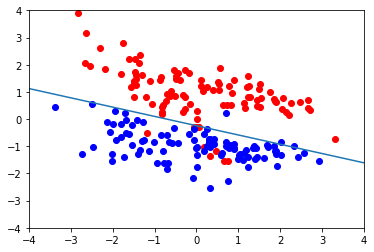

In [15]:
x_values = np.linspace(-5,5,1000)
desc_boundary = manual_slope*x_values+ manual_intercept 
plt.figure()
plt.scatter(red_x[:,0], red_x[:,1], color="red")
plt.scatter(blue_x[:,0], blue_x[:,1], color="blue")
plt.plot(x_values, desc_boundary)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()